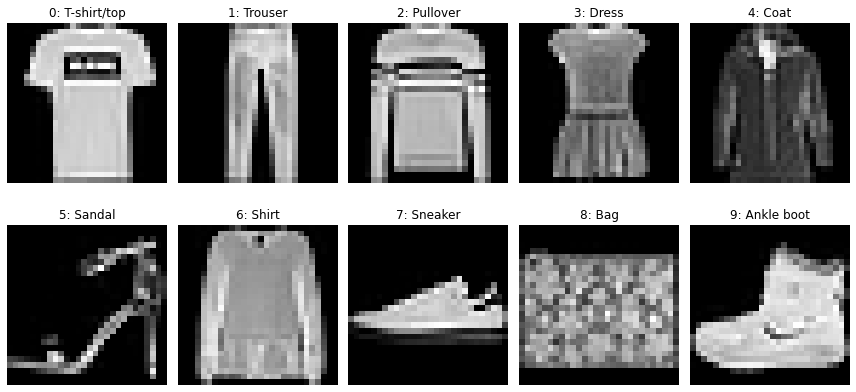

In [ ]:
### Printing Images

import wandb
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist

wandb.init(project="DL_Assignment_01", name="fashion_mnist_sample_grid")

(X_train, y_train), (_, _) = fashion_mnist.load_data()

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    idx = np.where(y_train == i)[0][0]
    ax.imshow(X_train[idx], cmap="gray")
    ax.set_title(f"{i}: {class_names[i]}")
    ax.axis("off")

plt.tight_layout()

wandb.log({"Fashion-MNIST Sample Images": wandb.Image(fig)})

plt.show()
wandb.finish()


Test code for MNIST

Starting run: mnist_nadam_tanh_3_128_64
11501568/11490434 [==============================] - 3s 0us/step
Epoch 1/10: Loss=0.2757, Acc=0.9176, Val Loss=0.1654, Val Acc=0.9502
Epoch 2/10: Loss=0.1278, Acc=0.9614, Val Loss=0.1109, Val Acc=0.9638
Epoch 3/10: Loss=0.0874, Acc=0.9730, Val Loss=0.1015, Val Acc=0.9687
Epoch 4/10: Loss=0.0648, Acc=0.9791, Val Loss=0.0794, Val Acc=0.9767
Epoch 5/10: Loss=0.0498, Acc=0.9838, Val Loss=0.0799, Val Acc=0.9755
Epoch 6/10: Loss=0.0396, Acc=0.9873, Val Loss=0.0815, Val Acc=0.9760
Epoch 7/10: Loss=0.0314, Acc=0.9897, Val Loss=0.0803, Val Acc=0.9760
Epoch 8/10: Loss=0.0259, Acc=0.9913, Val Loss=0.0722, Val Acc=0.9783
Epoch 9/10: Loss=0.0213, Acc=0.9930, Val Loss=0.0876, Val Acc=0.9750
Epoch 10/10: Loss=0.0191, Acc=0.9937, Val Loss=0.0805, Val Acc=0.9783
Test Accuracy: 0.9747
Test Accuracy for mnist_nadam_tanh_3_128_64: 97.47%


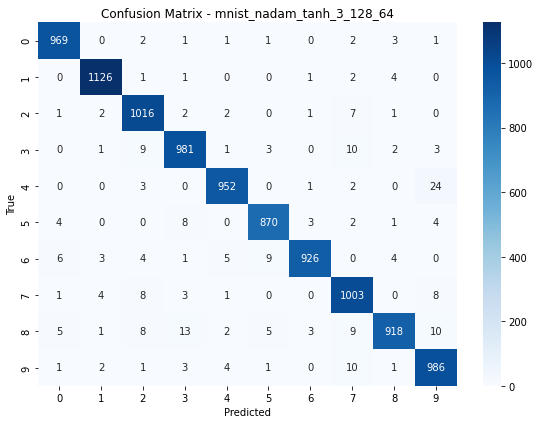

accuracy,▁▅▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▄▆█▇▇▇█▇█
val_loss,█▄▃▂▂▂▂▁▂▂
accuracy,0.99374
epoch,10
loss,0.0191
val_accuracy,0.97833
val_loss,0.08049


Starting run: mnist_nadam_relu_3_128_64
Epoch 1/10: Loss=0.2646, Acc=0.9211, Val Loss=0.1181, Val Acc=0.9655
Epoch 2/10: Loss=0.1085, Acc=0.9670, Val Loss=0.0867, Val Acc=0.9740
Epoch 3/10: Loss=0.0759, Acc=0.9767, Val Loss=0.0946, Val Acc=0.9735
Epoch 4/10: Loss=0.0576, Acc=0.9816, Val Loss=0.0862, Val Acc=0.9725
Epoch 5/10: Loss=0.0455, Acc=0.9852, Val Loss=0.0751, Val Acc=0.9785
Epoch 6/10: Loss=0.0373, Acc=0.9875, Val Loss=0.0796, Val Acc=0.9770
Epoch 7/10: Loss=0.0328, Acc=0.9894, Val Loss=0.0864, Val Acc=0.9763
Epoch 8/10: Loss=0.0275, Acc=0.9906, Val Loss=0.0933, Val Acc=0.9767
Epoch 9/10: Loss=0.0260, Acc=0.9916, Val Loss=0.0834, Val Acc=0.9783
Epoch 10/10: Loss=0.0231, Acc=0.9922, Val Loss=0.0893, Val Acc=0.9795
Test Accuracy: 0.9785
Test Accuracy for mnist_nadam_relu_3_128_64: 97.85%


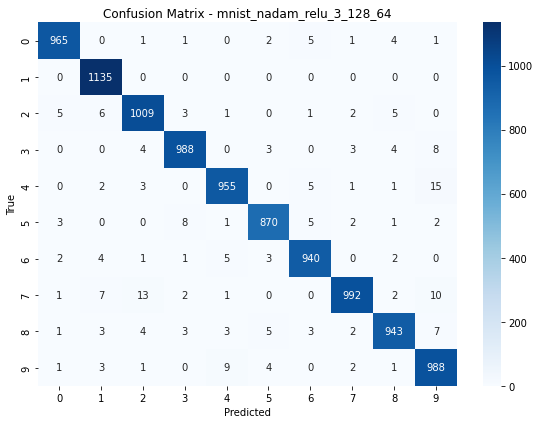

accuracy,▁▆▆▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▁▁▁▁▁
val_accuracy,▁▅▅▅█▇▆▇▇█
val_loss,█▃▄▃▁▂▃▄▂▃
accuracy,0.99216
epoch,10
loss,0.02309
val_accuracy,0.9795
val_loss,0.08931


Starting run: mnist_adam_relu_5_128_64
Epoch 1/10: Loss=0.2783, Acc=0.9153, Val Loss=0.1459, Val Acc=0.9552
Epoch 2/10: Loss=0.1160, Acc=0.9649, Val Loss=0.1271, Val Acc=0.9615
Epoch 3/10: Loss=0.0835, Acc=0.9747, Val Loss=0.0991, Val Acc=0.9700
Epoch 4/10: Loss=0.0679, Acc=0.9796, Val Loss=0.0918, Val Acc=0.9732
Epoch 5/10: Loss=0.0592, Acc=0.9810, Val Loss=0.0968, Val Acc=0.9730
Epoch 6/10: Loss=0.0465, Acc=0.9857, Val Loss=0.0973, Val Acc=0.9738
Epoch 7/10: Loss=0.0392, Acc=0.9877, Val Loss=0.1054, Val Acc=0.9722
Epoch 8/10: Loss=0.0384, Acc=0.9877, Val Loss=0.1021, Val Acc=0.9740
Epoch 9/10: Loss=0.0313, Acc=0.9899, Val Loss=0.0929, Val Acc=0.9777
Epoch 10/10: Loss=0.0317, Acc=0.9900, Val Loss=0.0899, Val Acc=0.9758
Test Accuracy: 0.9775
Test Accuracy for mnist_adam_relu_5_128_64: 97.75%


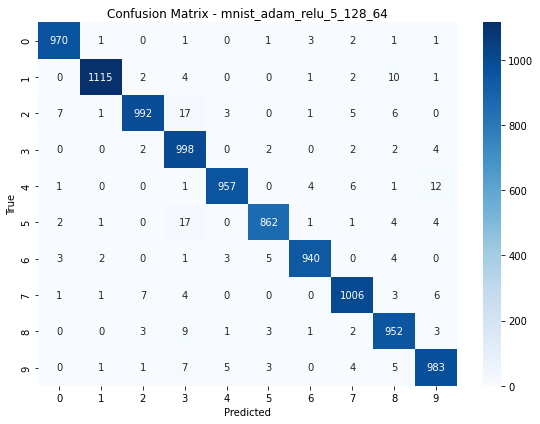

accuracy,▁▆▇▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▃▆▇▇▇▆▇█▇
val_loss,█▆▂▁▂▂▃▃▁▁
accuracy,0.98999
epoch,10
loss,0.03171
val_accuracy,0.97583
val_loss,0.08993


In [ ]:
import wandb

top_config_list = [
    {"run_name": "mnist_nadam_tanh_3_128_64", "optimizer": "nadam", "activation": "tanh", "num_layers": 3, "hidden_size": 128, "batch_size": 64},
    {"run_name": "mnist_nadam_relu_3_128_64", "optimizer": "nadam", "activation": "relu", "num_layers": 3, "hidden_size": 128, "batch_size": 64},
    {"run_name": "mnist_adam_relu_5_128_64",  "optimizer": "adam",  "activation": "relu", "num_layers": 5, "hidden_size": 128, "batch_size": 64}
]

common_params = {
    "epochs": 10,
    "learning_rate": 0.001,
    "weight_decay": 0.0005,
    "weight_init": "xavier",
    "loss": "cross_entropy",
    "momentum": 0.9,
    "beta": 0.9,
    "beta1": 0.9,
    "beta2": 0.999,
    "epsilon": 1e-8
}

for cfg in top_config_list:
    run_name = cfg["run_name"]
    wandb.init(project="DL_Assignment_01", name=run_name)
    config = wandb.config
    
    config.epochs = common_params["epochs"]
    config.learning_rate = common_params["learning_rate"]
    config.weight_decay = common_params["weight_decay"]
    config.weight_init = common_params["weight_init"]
    config.loss = common_params["loss"]
    config.momentum = common_params["momentum"]
    config.beta = common_params["beta"]
    config.beta1 = common_params["beta1"]
    config.beta2 = common_params["beta2"]
    config.epsilon = common_params["epsilon"]
    
 
    config.batch_size = cfg["batch_size"]
    config.num_layers = cfg["num_layers"]
    config.hidden_size = cfg["hidden_size"]
    config.activation = cfg["activation"]
    config.optimizer = cfg["optimizer"]
    
    print("Starting run:", run_name)
    
    
    X_train, y_train, X_val, y_val, X_test, y_test = load_data("mnist")
    input_size = X_train.shape[1]  # 28*28 = 784
    output_size = 10               # 10 classes
    hidden_sizes = [config.hidden_size] * config.num_layers
    
    
    network = NeuralNetwork(input_size, hidden_sizes, output_size, 
                            activation=config.activation, 
                            weight_init=config.weight_init, 
                            loss_func=config.loss)
    optimizer = Optimizer(network.params, config.optimizer, config.learning_rate,
                          momentum=config.momentum, beta=config.beta,
                          beta1=config.beta1, beta2=config.beta2,
                          epsilon=config.epsilon, weight_decay=config.weight_decay)
    
    
    network = train_model(network, optimizer, X_train, y_train, X_val, y_val, 
                          config.epochs, config.batch_size)
    
    
    predictions, true_labels, test_acc = evaluate_model(network, X_test, y_test)
    print("Test Accuracy for {}: {:.2f}%".format(run_name, test_acc * 100))
    
 
    classes = [str(i) for i in range(10)]
    plot_conf_matrix(true_labels, predictions, classes, title="Confusion Matrix - " + run_name)
    
    wandb.finish()


4431872/4422102 [==============================] - 1s 0us/step
Epoch 1/5: Loss=0.5225, Acc=0.8129, Val Loss=0.4337, Val Acc=0.8410
Epoch 2/5: Loss=0.3862, Acc=0.8597, Val Loss=0.3725, Val Acc=0.8660
Epoch 3/5: Loss=0.3447, Acc=0.8743, Val Loss=0.3380, Val Acc=0.8752
Epoch 4/5: Loss=0.3256, Acc=0.8800, Val Loss=0.3471, Val Acc=0.8682
Epoch 5/5: Loss=0.3100, Acc=0.8853, Val Loss=0.3504, Val Acc=0.8748
Test Accuracy: 0.8663


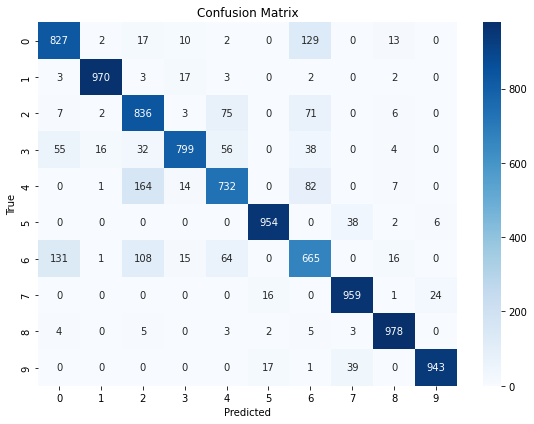

wandb: ERROR Control-C detected -- Run data was not synced


In [ ]:
import wandb

# Initialize a new Wandb run
wandb.init(project="DL_Assignment_01")
config = wandb.config
config.learning_rate = 0.001
config.batch_size = 32
config.epochs = 5
config.num_layers = 2      # Example: 2 hidden layers
config.hidden_size = 64    # Example: 64 neurons per hidden layer
config.activation = "relu"
config.weight_init = "xavier"
config.loss = "cross_entropy"
config.optimizer = "adam"  # Options: sgd, momentum, nag, rmsprop, adam, nadam
config.momentum = 0.9
config.beta = 0.9
config.beta1 = 0.9
config.beta2 = 0.999
config.epsilon = 1e-8
config.weight_decay = 0.0001

# Load and preprocess data
X_train, y_train, X_val, y_val, X_test, y_test = load_data("fashion_mnist")
input_size = X_train.shape[1]
output_size = 10  # 10 classes
hidden_sizes = [config.hidden_size] * config.num_layers

# Initialize the Neural Network and Optimizer
network = NeuralNetwork(input_size, hidden_sizes, output_size, config.activation, config.weight_init, config.loss)
optimizer = Optimizer(network.params, config.optimizer, config.learning_rate,
                      momentum=config.momentum, beta=config.beta,
                      beta1=config.beta1, beta2=config.beta2,
                      epsilon=config.epsilon, weight_decay=config.weight_decay)

# Train the model
network = train_model(network, optimizer, X_train, y_train, X_val, y_val, config.epochs, config.batch_size)

# Evaluate the model on the test set
predictions, true_labels, test_acc = evaluate_model(network, X_test, y_test)

# Plot the confusion matrix
classes = [str(i) for i in range(10)]
plot_conf_matrix(true_labels, predictions, classes)

# Finish the Wandb run
wandb.finish()


In [1]:
import wandb

sweep_config = {
    "method": "grid",  # Use grid search over the refined hyperparameter space
    "name": "grid_top20_best",
    "metric": {
         "name": "val_accuracy",
         "goal": "maximize"
    },
    "parameters": {
         "epochs": {"values": [10]},                     # Fixed to 5 epochs
         "hidden_layers": {"values": [3, 4, 5]},          # Based on top 20 runs
         "hidden_layer_size": {"values": [128, 64, 32]},  # Based on top 20 runs
         "batch_size": {"values": [64, 32, 16]},          # Based on top 20 runs
         "learning_rate": {"values": [0.001]},            # Fixed
         "optimiser": {"values": ["nadam", "adam"]},      # Top performers
         "weight_init": {"values": ["xavier"]},           # Fixed
         "activation": {"values": ["tanh", "relu"]},        # Top choices
         "weight_decay": {"values": [0.0005]}             # Fixed
    }
}

grid_sweep_id = wandb.sweep(sweep_config, project="DL_Assignment_01")
print("Sweep ID:", grid_sweep_id)


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Create sweep with ID: 9f34spkv
Sweep URL: https://wandb.ai/da24m016-indian-institute-of-technology-madras/DL_Assignment_01/sweeps/9f34spkv
Sweep ID: 9f34spkv


In [8]:
def sweep_train():
    # Initialize a new run; configuration values are pulled from the sweep config.
    run = wandb.init()
    config = wandb.config

    # Set the run name based on the sweep configuration.
    # Note: Keys must match those in the sweep configuration.
    run_name = f"{config.optimiser}_{config.activation}_{config.hidden_layers}_{config.hidden_layer_size}_{config.batch_size}"
    wandb.run.name = run_name
    print("Run Name:", run_name)
    
    # --- Data Loading & Preprocessing ---
    from keras.datasets import fashion_mnist
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    
    # Normalize and reshape images
    X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
    X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
    num_classes = 10
    y_train = np.eye(num_classes)[y_train]
    y_test = np.eye(num_classes)[y_test]
    
    # Split training data: 90% train, 10% validation
    split_index = int(0.9 * X_train.shape[0])
    X_val = X_train[split_index:]
    y_val = y_train[split_index:]
    X_train = X_train[:split_index]
    y_train = y_train[:split_index]
    
    input_size = X_train.shape[1]  # 784 for 28x28 images
    output_size = num_classes
    
    # Create a list of hidden layer sizes
    hidden_sizes = [config.hidden_layer_size] * config.hidden_layers

    # --- Model & Optimizer Initialization ---
    # Assuming NeuralNetwork and Optimizer classes have been defined in previous cells.
    model = NeuralNetwork(input_size, hidden_sizes, output_size, 
                          activation=config.activation, 
                          weight_init=config.weight_init, 
                          loss_func="cross_entropy")
    
    optimizer = Optimizer(model.params, config.optimiser, config.learning_rate,
                          momentum=0.9, beta=0.9, beta1=0.9, beta2=0.999,
                          epsilon=1e-8, weight_decay=config.weight_decay)
    
    # --- Training ---
    # Assuming train_model is a function that trains the model and logs per-epoch metrics.
    model = train_model(model, optimizer, X_train, y_train, X_val, y_val, 
                        epochs=config.epochs, batch_size=config.batch_size)
    
    # --- Evaluation on Validation Set ---
    y_val_pred, _ = model.forward(X_val)
    val_loss = model.compute_loss(y_val_pred, y_val)
    predictions_val = np.argmax(y_val_pred, axis=1)
    true_labels_val = np.argmax(y_val, axis=1)
    val_acc = np.mean(predictions_val == true_labels_val)
    
    # Log final validation metrics
    wandb.log({
        "final_val_loss": val_loss,
        "final_val_accuracy": val_acc
    })
    
    run.finish()


In [ ]:
wandb.agent(grid_sweep_id, function=sweep_train, count=108)
print("Sweep Grid completed!")